In [25]:
import pandas as pd
import os
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

MSH = os.getenv('MSH')

import sys
sys.path.append('{0}/../'.format(MSH))

from common_libs.db_conn import DBConn

%matplotlib inline

In [10]:
conn = DBConn('{0}/credentials.json'.format(MSH))
data = conn.export('customer_attributes', schema='clean', index_col='customer_id')


In [23]:
data[v].dropna().values

array([  2.  ,   4.33,  14.75, ...,   0.58,   0.  ,   0.08])

/Users/jjardel/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


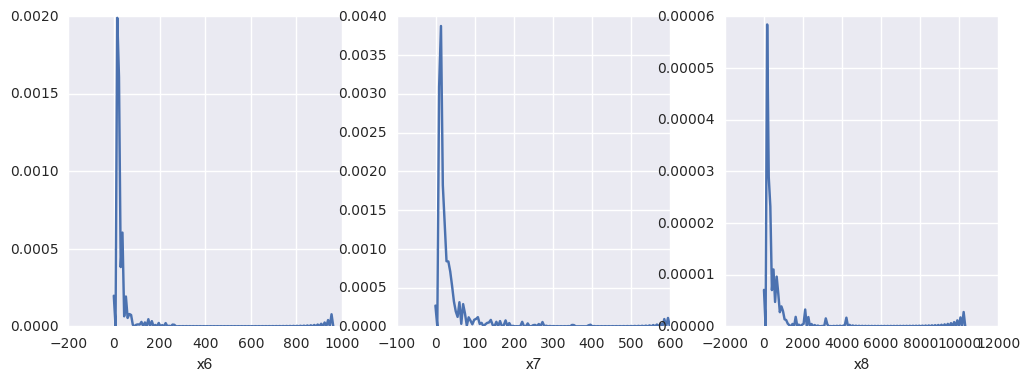

In [31]:
figsize(12, 4)
fig, ax = plt.subplots(1, 3)
numerical_vars = ['x6', 'x7', 'x8']
for i, v in enumerate(numerical_vars):
    plt.subplot(1, 3, i + 1)
    ax = sns.kdeplot(data[v].dropna().values)
    ax.set_xlabel(v)
    

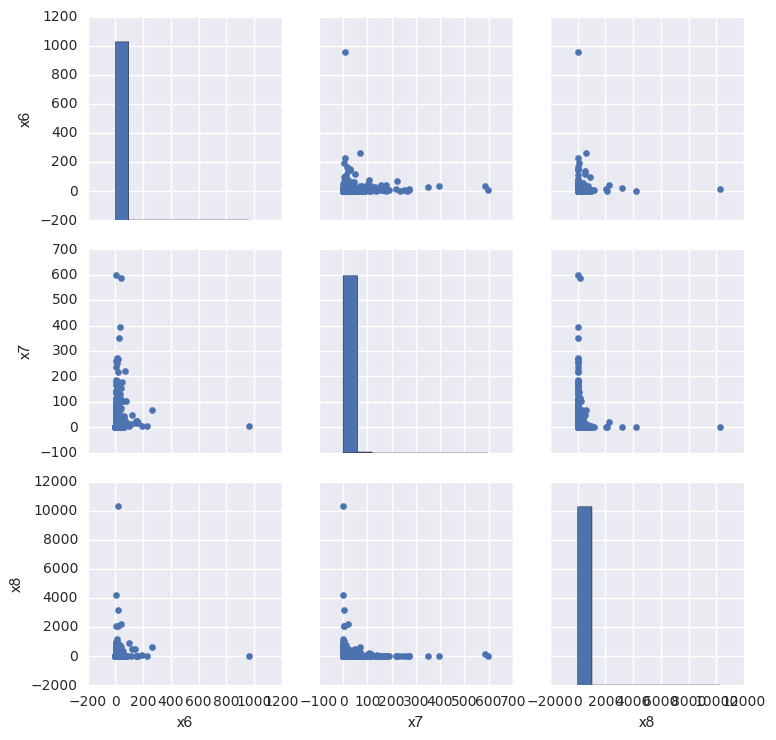

In [33]:
g = sns.PairGrid(data[['x6', 'x7', 'x8']].dropna(axis=0))
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Random Thoughts

 - There are an awful lot of cancellations that are N months (quarters?) after the signup date
     - prove this
     - if true, engineer a feature around it.  nvm--can't do that with active customers
     
     
 - treat NULLS in numeric columns different from those in categorical columns.  Can we impute the former?  Can we group the latter into a common class?
 - possibly important additional features:
   - days since signup ("today" is Jan 14, 2016)
   - 

In [19]:
data

,signup_date,status,cancel_date,x1,x2,x3,x4,x5,x6,x7,x8
0,2015-03-17,canceled,2015-06-13,1.33,<NA>,8dda9d7a,822f8500,7ee164d9,0.52,NaN,2.00
1,2013-12-19,canceled,2015-01-05,0.33,<NA>,f4a15c3f,40183e04,2ea67079,NaN,NaN,4.33
2,2014-07-29,canceled,2014-10-29,1.00,<NA>,ab153736,d27e54e5,4b29bcce,2.75,0.50,14.75
3,2015-09-30,canceled,2015-12-30,1.33,416e1394,87109cbe,ba2bc7b6,91d78334,1.72,0.95,3.08
4,2014-06-11,canceled,2014-12-11,1.00,<NA>,f4a15c3f,40183e04,7ee164d9,0.39,1.13,2.25
5,2015-10-28,active,NaN,2.00,416e1394,f4a15c3f,6f749b17,91d78334,0.99,2.01,0.25
6,2014-10-02,active,NaN,1.00,<NA>,20c137ea,6f749b17,7ee164d9,3.91,2.00,2.17
7,2013-03-05,canceled,2013-07-05,1.00,<NA>,f4a15c3f,ba2bc7b6,4b29bcce,NaN,NaN,NaN
8,2012-12-07,canceled,2014-08-07,1.00,<NA>,b72f2f48,ba2bc7b6,7ee164d9,0.39,0.18,5.42
9,2012-11-08,canceled,2013-04-04,1.00,<NA>,f4a15c3f,6f749b17,4b29bcce,NaN,NaN,NaN
